In [50]:
%matplotlib inline
import pandas as pd
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [51]:

df=pd.read_csv('C:\\Users\\csstf107\\Desktop\\titanic_dataset.csv')
#pd.DataFrame=df
df
df.set_index('PassengerId',inplace=True)
df.info()
print(df.columns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.1+ KB
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


11


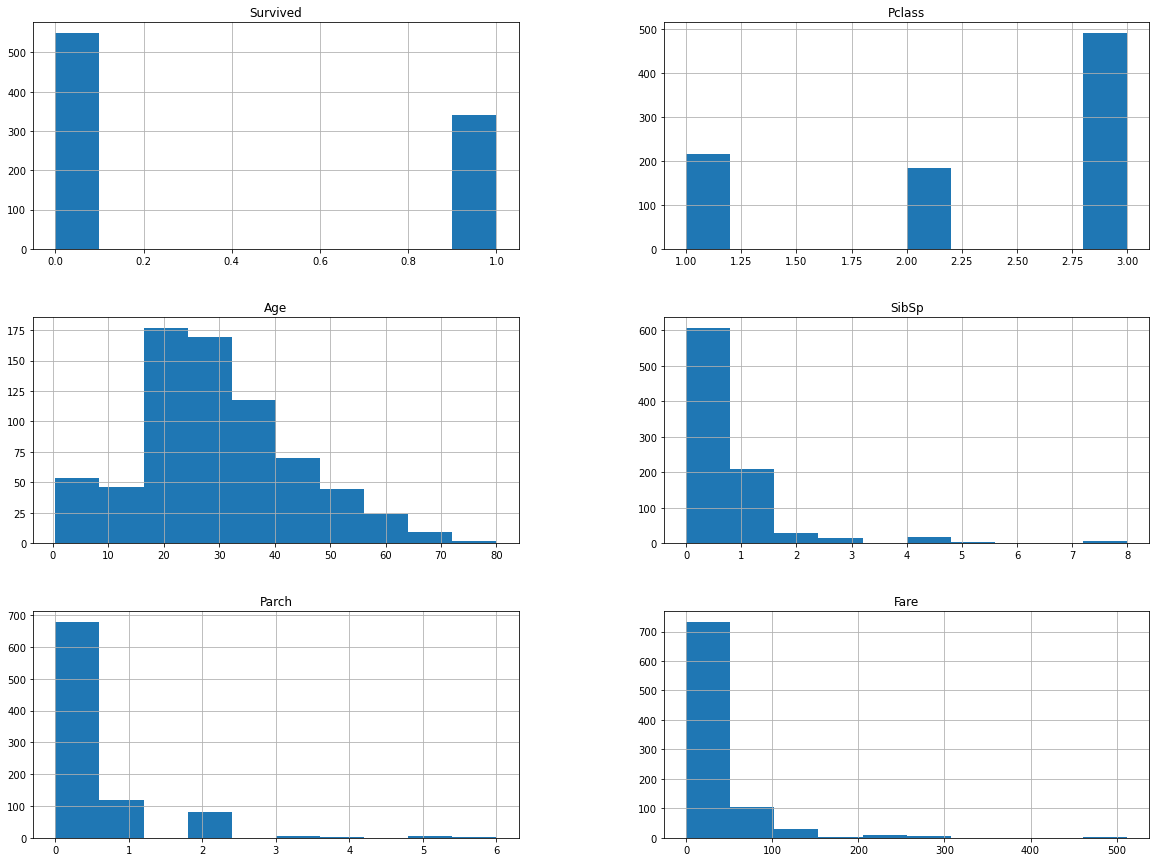

Survived=0
Pcalss=0
Name=0
sex=0
Age=177
Sibsp=0
PArch=0
Ticket=0
Fare=0
CAbin=687
Embarked=2


In [52]:
#Checking null values
print(len(df.columns))
#for i in range(0,11):
df.isna().sum()
fraggraph=df
fraggraph.hist(figsize=[20,15])
plt.show()
def check_null_column():
    print('Survived='+str(df['Survived'].isna().sum()))
    print('Pcalss='+str(df['Pclass'].isna().sum()))
    print('Name='+str(df['Name'].isna().sum()))
    print('sex='+str(df['Sex'].isna().sum()))
    print('Age='+str(df['Age'].isna().sum()))
    print('Sibsp='+str(df['SibSp'].isna().sum()))
    print('PArch='+str(df['Parch'].isna().sum()))
    print('Ticket='+str(df['Ticket'].isna().sum()))
    print('Fare='+str(df['Fare'].isna().sum()))
    print('CAbin='+str(df['Cabin'].isna().sum()))
    print('Embarked='+str(df['Embarked'].isna().sum()))
    return
check_null_column()

In [53]:
#Filling null values
df['Age'] = df['Age'].fillna(df['Age'].mean())

print(df)
df['Embarked']=df['Embarked'].fillna('S')
df([df.drop('Cabin')],inplace=True)


             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex  \
PassengerId                                                              
1                                      Braund, Mr. Owen Harris    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
3                                       Heikkinen, Miss. Laina  female   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
5                                     Allen, Mr. William Henry    male   
...                                                 

KeyError: "['Cabin'] not found in axis"

In [54]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


Survived=0
Pcalss=0
Name=0
sex=0
Age=0
Sibsp=0
PArch=0
Ticket=0
Fare=0
CAbin=687
Embarked=0


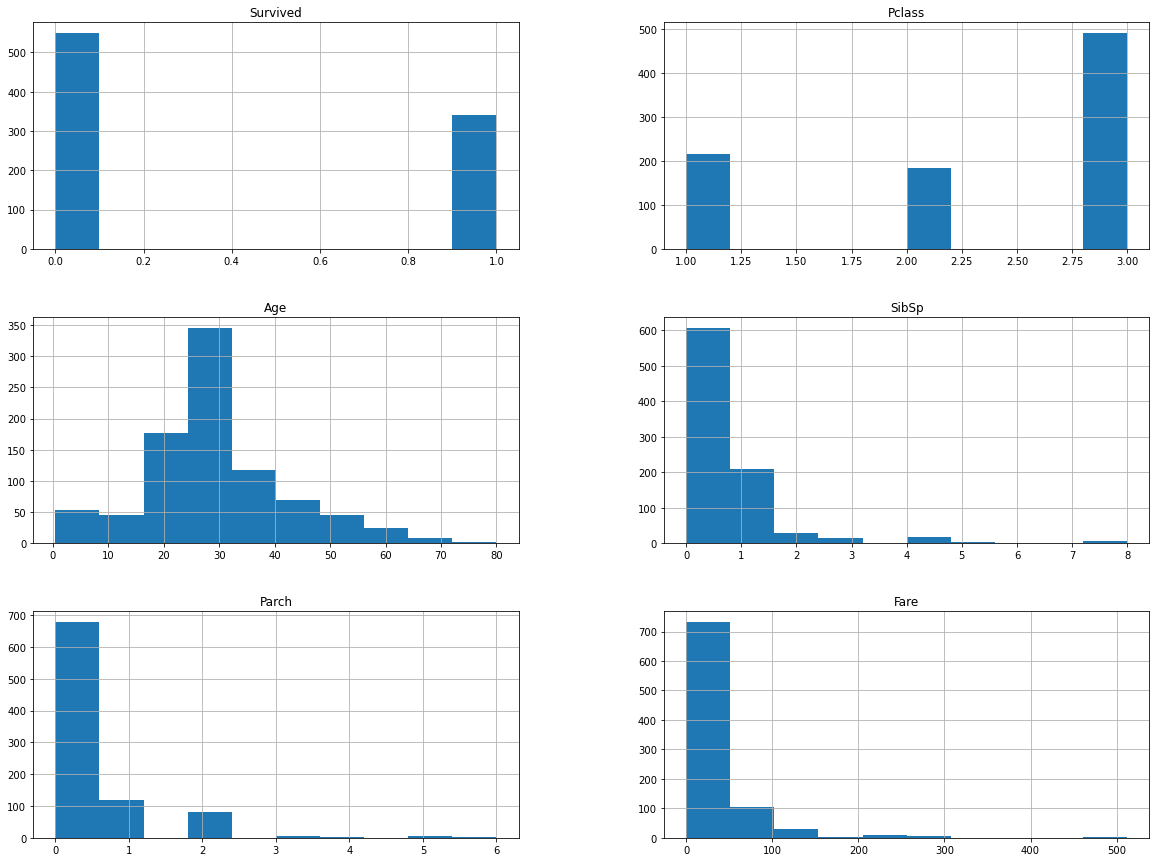

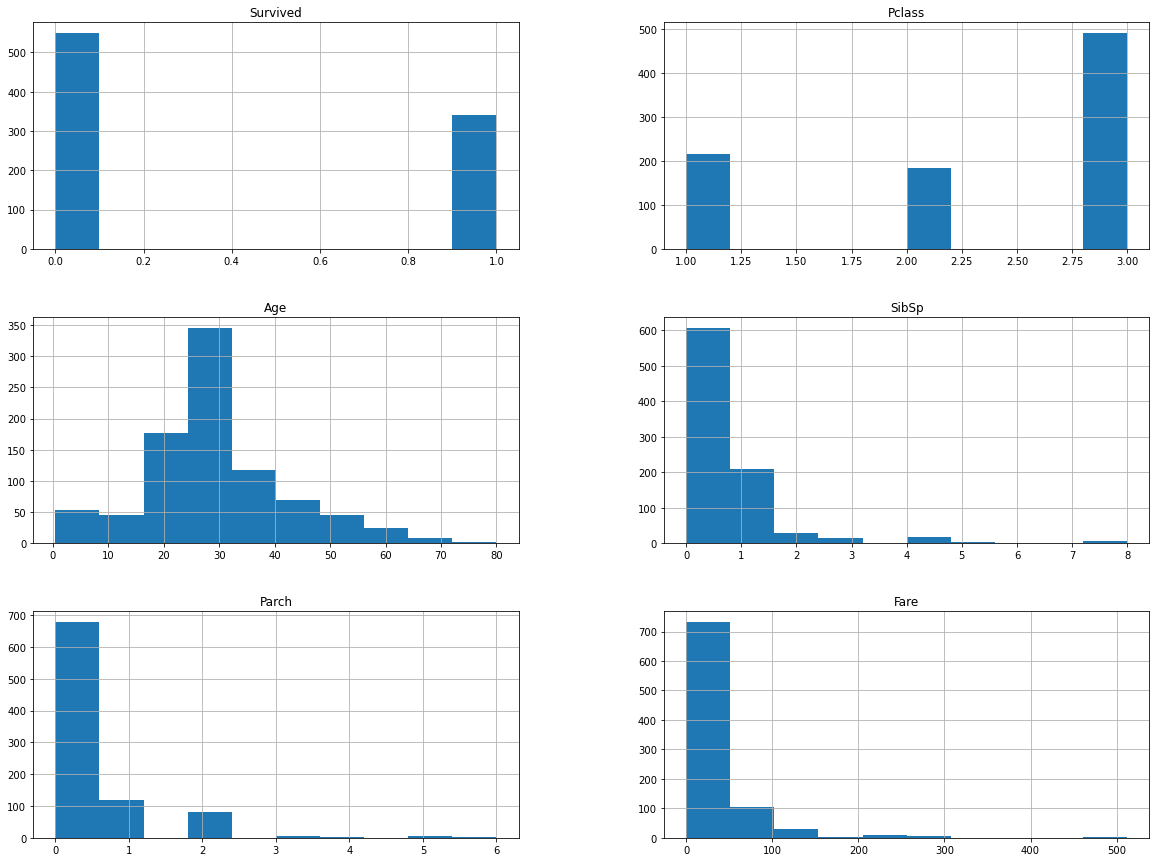

In [55]:
check_null_column()

fraggraph=df 
fraggraph.hist(figsize=[20,15])
plt.show()

df.Cabin.nunique()

df.drop('Cabin',axis=1,inplace=True)
fraggraph=df
fraggraph.hist(figsize=[20,15])
plt.show()

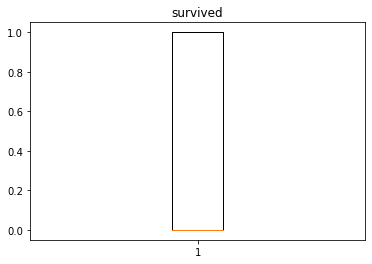

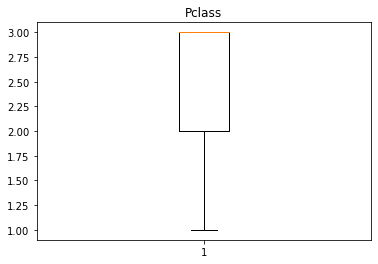

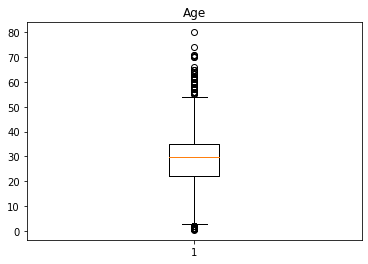

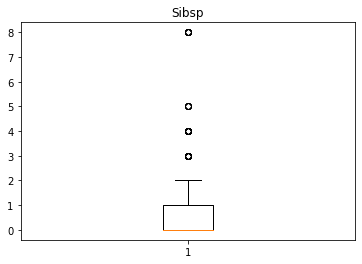

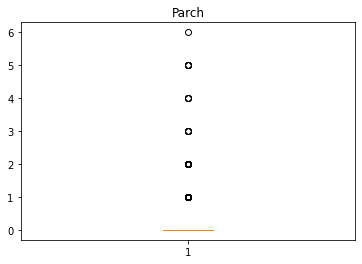

In [56]:
#Chk for outliers
plt.boxplot(df['Survived'])
plt.title("survived")
plt.show()

plt.boxplot(df['Pclass'])
plt.title("Pclass")
plt.show()

plt.boxplot(df['Age'])
plt.title("Age")
plt.show()

plt.boxplot(df['SibSp'])
plt.title("Sibsp")
plt.show()

plt.boxplot(df['Parch'])
plt.title("Parch")
plt.show()

In [57]:
#Removing Outliers
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

IQR=Q3-Q1
llimit=Q1-(1.5*IQR)
ulimit=Q3+(1.5*IQR)
print("limits")
print(llimit)
print(ulimit)
outlier=[]
for x in df['Age']:
    if((x>ulimit) or (x<llimit)):
        outlier.append(x)
print(outlier)
ind1=df['Age']>ulimit

df.loc[ind1].index
df.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)


22.0
29.69911764705882
35.0
limits
2.5
54.5
[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [58]:
#Removing Outliers
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

IQR=Q3-Q1
llimit=Q1-(1.5*IQR)
ulimit=Q3+(1.5*IQR)
print(llimit)
print(ulimit)
outlier=[]
for x in df['SibSp']:
    if((x>ulimit) or (x<llimit)):
        outlier.append(x)
print(outlier)
ind1=df['SibSp']>ulimit
df.loc[ind1].index
df.drop([8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 851, 864],inplace=True)

0.0
0.0
1.0
-1.5
2.5
[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 4, 8]


In [59]:
#min max scaling
np.reshape(-1, 1)

y=df['Survived']
x=df['Age']

min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=np.DataFrame(x)
x.describe()
plt.plot(x)
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is',mean_squared_error(y_test,predictions))
print('R squared values',r2_score(y_test,predictions))


ValueError: Expected 2D array, got 1D array instead:
array=[22.         38.         26.         35.         35.         29.69911765
 54.         27.         14.          4.         20.         39.
 14.         29.69911765 31.         29.69911765 35.         34.
 15.         28.         38.         29.69911765 29.69911765 29.69911765
 40.         29.69911765 29.69911765 28.         42.         29.69911765
 21.         18.         14.         40.         27.         29.69911765
  3.         19.         29.69911765 29.69911765 29.69911765 29.69911765
 18.         21.         49.         29.         29.69911765 21.
 28.5         5.         22.         38.         45.         29.69911765
 29.69911765 29.         19.         26.         32.         21.
 26.         32.         25.         29.69911765 29.69911765  0.83
 30.         22.         29.         29.69911765 28.         17.
 16.         29.69911765 24.         29.         20.         46.
 26.         29.69911765 23.         34.         34.         28.
 29.69911765 21.         33.         37.         28.         21.
 29.69911765 38.         29.69911765 47.         14.5        22.
 20.         17.         21.         29.         24.         21.
 29.69911765 32.5        32.5        54.         12.         29.69911765
 24.         29.69911765 45.         33.         20.         47.
 29.         25.         23.         19.         37.         16.
 24.         29.69911765 22.         24.         19.         18.
 19.         27.          9.         36.5        42.         51.
 22.         40.5        29.69911765 51.         16.         30.
 29.69911765 44.         40.         26.         17.          9.
 29.69911765 45.         29.69911765 28.          1.         21.
 18.         50.         30.         36.         29.69911765  1.
  4.         29.69911765 29.69911765 45.         40.         36.
 32.         19.         19.          3.         44.         29.69911765
 42.         29.69911765 24.         28.         34.         45.5
 18.          2.         32.         26.         16.         40.
 24.         35.         22.         30.         29.69911765 31.
 27.         42.         32.         30.         16.         27.
 51.         29.69911765 38.         22.         19.         20.5
 18.         35.         29.         24.         29.69911765 44.
  8.         19.         33.         29.69911765 29.69911765 29.
 22.         30.         44.         25.         24.         37.
 54.         29.69911765 29.         30.         41.         29.
 29.69911765 30.         35.         50.         29.69911765 52.
 40.         29.69911765 36.         25.         35.         29.69911765
 25.         41.         37.         29.69911765 45.         29.69911765
 35.         28.         16.         19.         29.69911765 33.
 30.         22.         42.         22.         26.         19.
 36.         24.         24.         29.69911765 23.5         2.
 29.69911765 50.         29.69911765 29.69911765 19.         29.69911765
 29.69911765  0.92       29.69911765 17.         30.         30.
 24.         18.         26.         28.         43.         26.
 24.         54.         31.         40.         22.         27.
 30.         22.         36.         36.         31.         16.
 29.69911765 45.5        38.         16.         29.69911765 29.69911765
 29.         41.         45.         45.          2.         28.
 25.         36.         24.         40.         29.69911765  3.
 42.         23.         29.69911765 15.         25.         29.69911765
 28.         22.         38.         29.69911765 29.69911765 40.
 29.         45.         35.         29.69911765 30.         29.69911765
 29.69911765 24.         25.         18.         19.         22.
 29.69911765 22.         27.         20.         19.         42.
  1.         32.         35.         29.69911765 18.         36.
 29.69911765 17.         36.         21.         28.         23.
 24.         22.         31.         46.         23.         28.
 39.         26.         21.         28.         20.         34.
 51.          3.         21.         29.69911765 29.69911765 33.
 29.69911765 44.         29.69911765 34.         18.         30.
 10.         29.69911765 21.         29.         28.         18.
 29.69911765 28.         19.         29.69911765 32.         28.
 29.69911765 42.         17.         50.         14.         21.
 24.         31.         45.         20.         25.         28.
 29.69911765  4.         13.         34.          5.         52.
 36.         29.69911765 30.         49.         29.69911765 29.
 29.69911765 50.         29.69911765 48.         34.         47.
 48.         29.69911765 38.         29.69911765 29.69911765  0.75
 29.69911765 38.         33.         23.         22.         29.69911765
 34.         29.         22.          2.         29.69911765 50.
 25.         35.         30.          9.         29.69911765 21.
 21.         29.69911765 54.         29.69911765 25.         24.
 17.         21.         29.69911765 37.         16.         18.
 33.         29.69911765 28.         26.         29.         29.69911765
 36.         54.         24.         47.         34.         29.69911765
 36.         32.         30.         22.         29.69911765 44.
 29.69911765 40.5        50.         29.69911765 39.         23.
  2.         29.69911765 17.         29.69911765 30.          7.
 45.         30.         29.69911765 22.         36.         32.
 50.         19.         29.69911765 33.          8.         17.
 27.         29.69911765 22.         22.         48.         29.69911765
 39.         36.         29.69911765 40.         28.         29.69911765
 29.69911765 24.         19.         29.         29.69911765 32.
 53.         36.         29.69911765 16.         19.         34.
 39.         29.69911765 32.         25.         39.         54.
 36.         29.69911765 18.         47.         22.         29.69911765
 35.         52.         47.         29.69911765 37.         36.
 29.69911765 49.         29.69911765 49.         24.         29.69911765
 29.69911765 44.         35.         36.         30.         27.
 22.         40.         39.         29.69911765 29.69911765 29.69911765
 35.         24.         34.         26.          4.         26.
 27.         42.         20.         21.         21.         21.
 26.         29.69911765 51.         32.         29.69911765 28.
 32.         31.         41.         29.69911765 20.         24.
 29.69911765  0.75       48.         19.         29.69911765 23.
 29.69911765 18.         21.         29.69911765 18.         24.
 29.69911765 32.         23.         50.         40.         47.
 36.         20.         32.         25.         29.69911765 43.
 29.69911765 40.         31.         31.         29.69911765 18.
 24.5        18.         43.         36.         29.69911765 27.
 20.         25.         19.         18.         15.         31.
  4.         29.69911765 25.         52.         44.         29.69911765
 49.         42.         18.         35.         18.         25.
 26.         39.         45.         42.         22.         29.69911765
 24.         29.69911765 48.         29.         52.         19.
 38.         27.         29.69911765 33.          6.         17.
 34.         50.         27.         20.         29.69911765 25.
 25.         29.         11.         29.69911765 23.         23.
 28.5        48.         35.         29.69911765 29.69911765 29.69911765
 36.         21.         24.         31.         16.         30.
 19.         31.          4.          6.         33.         23.
 48.          0.67       28.         18.         34.         33.
 29.69911765 41.         20.         36.         16.         51.
 29.69911765 30.5        29.69911765 32.         24.         48.
 29.69911765 54.         18.         29.69911765  5.         29.69911765
 43.         13.         17.         29.         29.69911765 25.
 25.         18.          1.         46.         29.69911765 16.
 29.69911765 25.         39.         49.         31.         30.
 30.         34.         31.         11.          0.42       27.
 31.         39.         18.         39.         33.         26.
 39.         35.         30.5        29.69911765 23.         31.
 43.         52.         27.         38.         27.         29.69911765
 29.69911765  1.         29.69911765 15.          0.83       29.69911765
 23.         18.         39.         21.         29.69911765 32.
 29.69911765 20.         16.         30.         34.5        17.
 42.         35.         28.         29.69911765  9.         16.
 44.         18.         45.         51.         24.         29.69911765
 41.         21.         48.         24.         42.         27.
 31.         29.69911765  4.         26.         47.         33.
 47.         28.         15.         20.         19.         29.69911765
 25.         33.         22.         28.         25.         39.
 27.         19.         29.69911765 26.         32.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: Expected 2D array, got 1D array instead:
array=[25.         29.69911765 25.         27.         19.         29.
 29.69911765  1.         46.          3.         35.         29.69911765
 29.69911765  8.         40.5        32.         52.         32.
 29.         22.         36.         48.         26.         29.
 29.69911765 45.         49.         26.         48.         18.
 39.         28.         24.         29.69911765 27.         29.69911765
  8.         29.69911765 29.69911765 22.         35.         50.
 33.         29.69911765 29.69911765 29.69911765 15.         51.
 49.         28.          0.92       21.         33.         31.
 51.         34.          3.         19.         42.         33.
 29.69911765 29.69911765 36.         45.         16.         29.69911765
 21.         40.         44.         54.         22.         29.69911765
 38.         29.69911765 30.5        29.69911765 45.         47.
 25.         41.         24.         14.         22.         22.
 32.         29.69911765 39.         52.         29.69911765 18.
 24.         29.69911765 19.         29.69911765 27.         48.
 40.         36.         23.         28.         38.         27.
 23.         28.         31.         42.         31.         15.
 18.         35.         28.         32.         21.         29.69911765
 16.         22.         38.         40.         30.         29.69911765
 20.         31.         22.         17.         22.         32.
 39.         30.         19.         42.         29.         16.
 24.         27.         47.         32.5        29.         42.
 29.69911765 34.         21.         50.         31.         29.69911765
 30.5        29.69911765 22.         39.         36.         21.
 18.         29.69911765 29.69911765 18.         27.         16.
 37.         44.         26.         34.         34.5         2.
 51.         23.         29.69911765 35.          1.         23.5
 19.         29.69911765 29.69911765  7.         24.         29.69911765
 36.         29.69911765 19.          4.         22.         29.69911765
 29.         29.69911765 32.         28.         36.         18.
 48.         44.         29.69911765 47.         31.         29.69911765
 29.69911765 36.         29.69911765 29.69911765 29.69911765 36.
 29.         27.         36.         54.         29.         39.
 32.         18.         37.         28.         29.69911765 19.
 18.         47.         45.5        45.         22.         22.
 30.         13.         33.         31.         18.         23.
 40.         29.69911765 29.69911765 26.         43.         29.
 24.         29.69911765 19.          0.67       39.         24.
 34.         30.         28.         23.         25.         29.69911765
 29.69911765 22.         30.         47.         29.69911765 22.
 32.          6.         29.69911765 21.         40.         54.
 24.         30.         34.         29.69911765 18.         40.
 29.69911765 50.         29.69911765 29.69911765 21.         19.
 29.69911765 39.         31.         36.         22.         47.
 25.         52.         29.69911765 28.         27.         17.
 18.         26.         34.         29.69911765 35.         28.
 34.         11.         28.         24.          0.83       14.
 29.         29.69911765  3.         39.         29.69911765 43.
 29.69911765 29.69911765  2.         33.          2.         30.
 38.         29.69911765 26.         25.         29.69911765 19.
 18.         50.         36.         29.69911765 16.         47.
 29.69911765 45.5        34.         22.         26.         34.
 29.69911765 22.         34.         27.         30.         29.69911765
 29.69911765 50.         29.69911765 29.69911765 51.         16.
 25.         32.         29.69911765 20.         14.5        24.
 36.          4.         18.         54.         15.          4.
 46.         30.         29.69911765 15.         29.         18.
 29.69911765 44.         28.         35.         36.         28.5
 24.         34.         29.69911765 45.         22.         24.
 50.         29.69911765 42.         21.         29.69911765 29.69911765
 19.         24.         21.         40.5        41.         41.
 36.         38.         36.         29.69911765 29.69911765 48.
 19.         21.         32.         24.         30.         42.
 36.         28.         33.         29.69911765 24.5        32.5
 38.          0.75       16.         29.69911765 50.         29.69911765
 29.69911765 29.69911765 28.         25.         14.         23.
  3.         28.         24.         40.         43.         23.
 32.         19.         45.         48.         18.         33.
 25.         29.69911765 29.69911765 28.         29.69911765 23.
  1.         31.         24.         32.         24.         27.
 24.         17.          9.          9.         20.5        40.
 29.69911765  5.         22.         30.         29.69911765 21.
 30.         29.69911765 29.69911765 36.5        36.         29.69911765
 42.         33.         30.         39.         27.         29.69911765
 29.69911765 17.         42.         32.         17.         29.69911765
 29.69911765 48.         20.         35.         49.         18.
 29.69911765 29.69911765 24.         40.         29.69911765 30.
 20.         29.69911765 35.         45.         30.         28.
 29.69911765 35.         42.         28.5        39.         23.
 24.         29.         29.69911765 29.69911765 27.         29.69911765
 16.         33.         29.69911765  4.          0.75       21.
 16.         45.         18.         29.69911765 29.69911765 24.
 25.         29.69911765 34.         32.         22.         21.
 35.         20.         34.         24.         25.         33.
 45.          4.         33.         29.69911765 35.         38.
 30.         20.         22.         21.         29.69911765 29.69911765
 28.         21.         14.         29.         29.69911765 28.
 18.         36.         33.         29.69911765 29.69911765 29.69911765
  4.         31.         40.         39.         29.69911765 25.
 29.69911765 17.          9.         29.69911765 39.         29.69911765
 31.          4.         29.69911765 27.         28.         42.
 54.         45.         32.         41.         29.69911765 19.
 29.69911765 29.69911765 29.69911765 30.         24.         36.
 26.         52.         43.         17.         54.         29.69911765
 21.         38.         23.         21.         23.         19.
 27.         29.69911765 29.         29.         29.69911765 38.
 29.69911765 26.         21.         28.         29.69911765 29.69911765
 29.69911765 50.         28.         44.         25.          6.
 36.         33.         29.69911765 19.         51.         21.
 20.         30.         29.69911765 29.69911765 18.         53.
 32.          2.         20.         15.         36.         29.69911765
 22.         47.         40.         24.         27.         42.
 47.         17.         17.         18.         29.69911765 48.
 42.         29.69911765 29.         10.         37.         24.
 29.69911765 24.         29.69911765 29.69911765 19.         38.
  5.         17.         12.         24.          9.         29.69911765].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

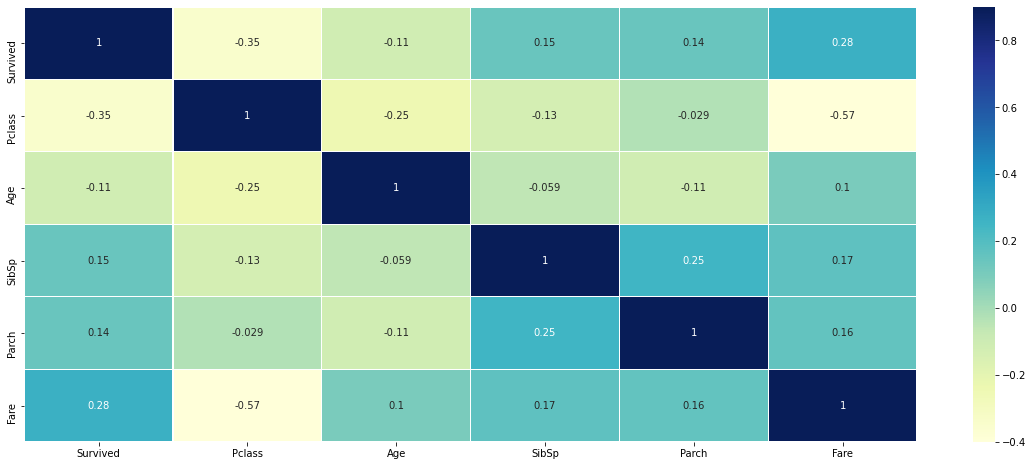

In [60]:
#Correlation matrix
import sklearn
from sklearn import linear_model
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

y=df['Survived']
x=df['Age']
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print('MSE is',mean_squared_error(y_test,predictions))
print('R squared values',r2_score(y_test,predictions))
